Be sure to install `ffmpeg` and `imageio-ffmpeg` inside this venv, and then update them:

```
$ conda install ffmpeg imageio-ffmpeg -c conda-forge
$ conda update ffmpeg
```

then restart the kernel before running this notebook

In [1]:
from math import sqrt
import random
import copy
import os
import sys
import time
import pickle

import numpy as np
from PIL import Image
import imageio

import matplotlib.pyplot as plt
%matplotlib inline

from IPython import display

#environment
import gym
import pybullet
import pybulletgym.envs
import pybullet_envs


#pytorch
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F

import TD3

# device setup
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

if torch.cuda.is_available():
    print('Using device:', torch.cuda.get_device_name(0))
else:
    print('Using device:', device)

Using device: GeForce GTX 1050
Using device: GeForce GTX 1050


In [2]:
SAVE_INDIVIDUAL_FRAMES = False
SHOW_PLOT = False

env_name = 'Humanoid-v2' #'Walker2d-v2'
directory = './Humanoid_10 million/'

env = gym.make(env_name)

policy = torch.load(directory + 'Td3_humanoid_10mil.pt')

RANDOM_SEED = 0

torch.manual_seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)

/home/roumen/anaconda3/envs/gymenv/lib/python3.6/site-packages/torch/serialization.py:658: SourceChangeWarning: source code of class 'torch.nn.modules.linear.Linear' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)


<function matplotlib.pyplot.gcf()>

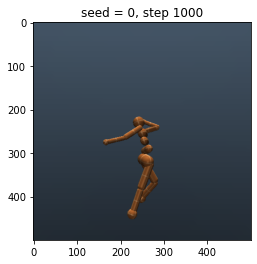

8.045301566283044


In [3]:
state = env.reset()
env.seed(RANDOM_SEED)
env.action_space.seed(RANDOM_SEED)

total_reward = 0
step = 0
done = False

frames = []
frames.append(env.render(mode='rgb_array'))

if SHOW_PLOT: 
    plt.figure()
    t = 'seed = {}, step {}'.format(RANDOM_SEED, step)
    plt.imshow(frames[-1])
    display.clear_output(wait=True)
    display.display(plt.gcf)
    plt.title(t)
    
    if SAVE_INDIVIDUAL_FRAMES: 
        plt.savefig("frames/" + t.replace(':', ' - '), dpi=150)
    
    plt.show()

while not done:
    # env.env._cam_dist=1
    # env.env._cam_pitch=-90
    #action = policy.actor(torch.FloatTensor(state).to(device)).detach().cpu().squeeze().numpy()
    action = policy.select_action(np.array(state))
    next_state, reward, done, _ = env.step(action)
    state = next_state
    step += 1
    total_reward += reward
    frames.append(env.render(mode='rgb_array'))
    
    if SHOW_PLOT:
        plt.figure()
        t = 'seed = {}, step {}'.format(RANDOM_SEED, step)
        plt.imshow(frames[-1])
        display.clear_output(wait=True)
        display.display(plt.gcf)
        plt.title(t)

        if SAVE_INDIVIDUAL_FRAMES: 
            plt.savefig(directory + 'frames/' + t.replace(':', ' - '), dpi=150)
        
        plt.show()

print(total_reward / step)

In [5]:
duration = 50 # milliseconds for one frame
fps = 1000 / duration

images = [Image.fromarray(np.array(f)) for f in frames]
images[0].save(directory + env_name + '.gif',
               save_all=True, 
               append_images=images[1:], 
               optimize=False, 
               duration=duration,
               loop=0)
imageio.mimsave(directory + env_name + '.mp4', images, 
                fps=fps, 
                codec='libx264', 
                quality=10, 
                pixelformat='yuvj444p')

IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (500, 500) to (512, 512) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).
